In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

# part 2:

In [2]:
#define image1 here
image1 = np.array(
    [[141, 0 , 138, 143, 143, 143, 144],
    [141, 140, 140, 142, 142, 143, 143],
    [140, 145, 145, 144, 142, 142, 145],
    [141, 141, 141, 143, 142, 141, 143],
    [139, 140, 141, 141, 142, 143, 144]]
)

In [3]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.histogram(image, bins=256, range=(0,256))[0]
    return(hist)

Text(0.5, 1.0, 'histogram')

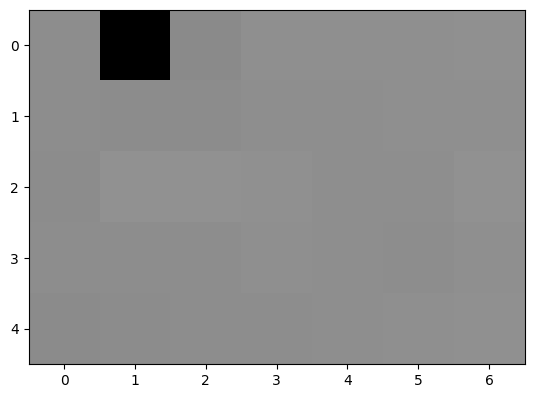

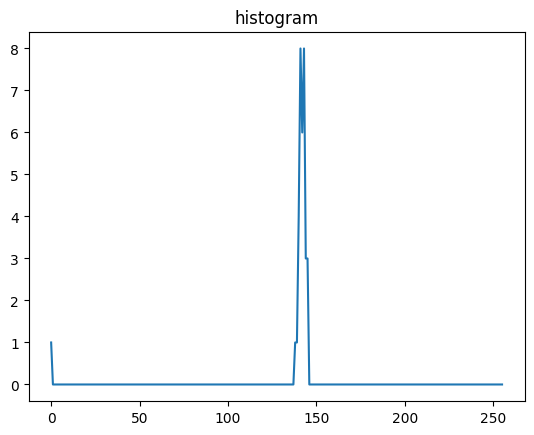

In [4]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [14]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  output_image = np.round((image - np.min(image)) / (np.max(image) - np.min(image)) * 255)
  # End
  return output_image


Text(0.5, 1.0, 'stretched histogram')

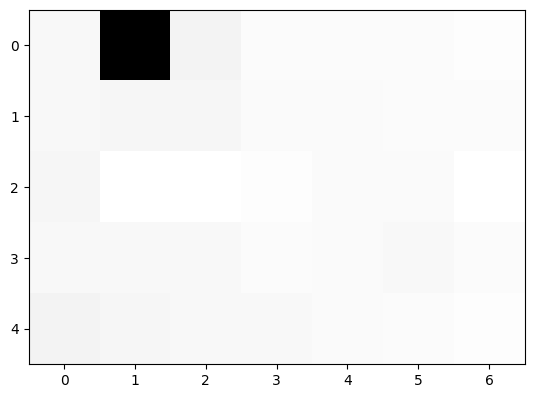

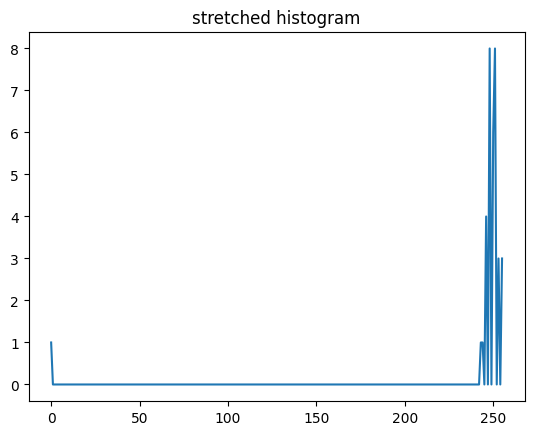

In [6]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [7]:
def get_lower_uppper_bound(image, p, only_lower=True):
    image_sorted = np.sort(image, axis=None)
    first_index = int(len(image_sorted) * p)
    last_index = int(len(image_sorted) * (1 - p))
    if only_lower:
        ready_for_clip = image_sorted[first_index:]
    else:
        ready_for_clip = image_sorted[first_index:last_index]
    return np.min(ready_for_clip), np.max(ready_for_clip)

In [8]:
#code here
#define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()
  # Start
  output_image = np.clip(output_image, min_value, max_value)
  output_image = stretch_hist(output_image)
  # End
  return output_image

lower bound is: 138 , and upper bound is: 145


Text(0.5, 1.0, 'clipped histogram')

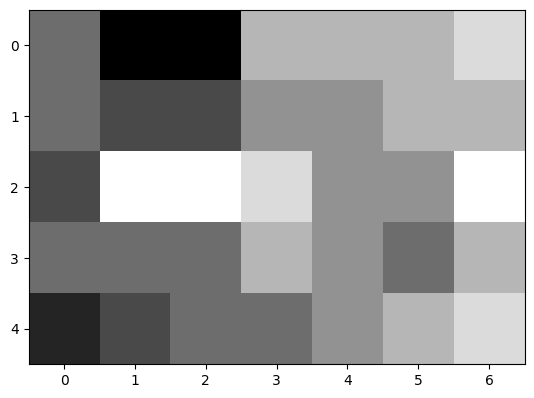

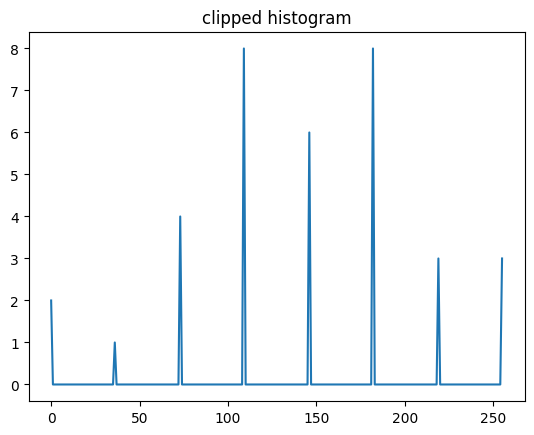

In [9]:
#dont change this cell
min_value, max_value = get_lower_uppper_bound(image1, p=0.05)
print('lower bound is:', min_value, ', and upper bound is:', max_value)
plt.imshow(clip_hist(image1, min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1, min_value, max_value)))
plt.title('clipped histogram')

lower bound is: 137 , and upper bound is: 145


Text(0.5, 1.0, 'clipped histogram')

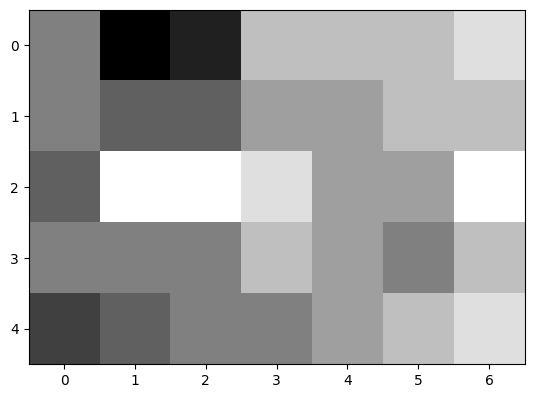

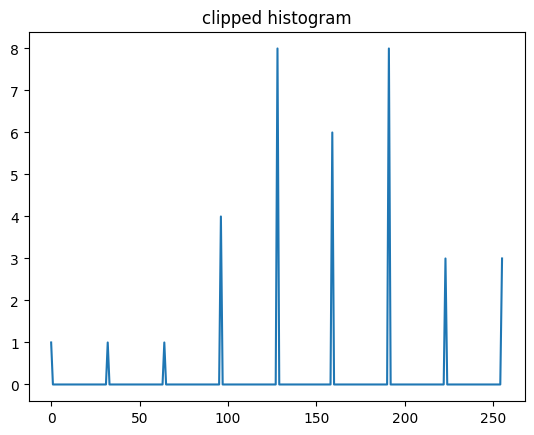

In [10]:
# Second approach (explained in doc)
min_value, max_value = get_lower_uppper_bound(image1, p=0.05)
print('lower bound is:', min_value - 1, ', and upper bound is:', max_value)
plt.imshow(clip_hist(image1, min_value - 1, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1, min_value - 1, max_value)))
plt.title('clipped histogram')

# part3


In [ ]:
from google.colab.patches import cv2_imshow

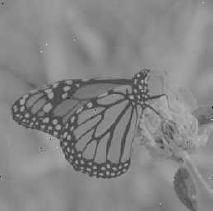

In [ ]:
# first read the image and show it.(image2)
image2 = cv2.imread('image2.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(image2)

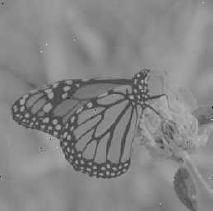

In [ ]:
#use stretch_hist function to improve quality of the image and show it
stretched_image = stretch_hist(image2)
cv2_imshow(stretched_image)

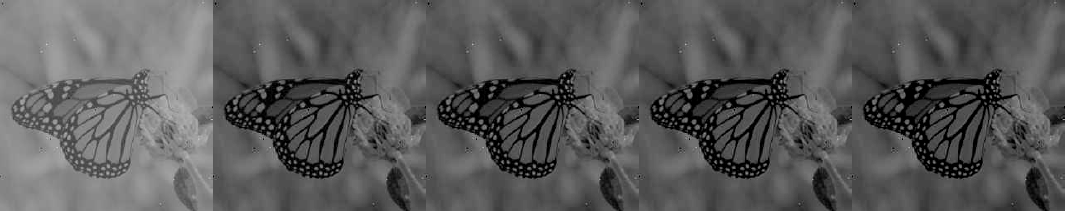

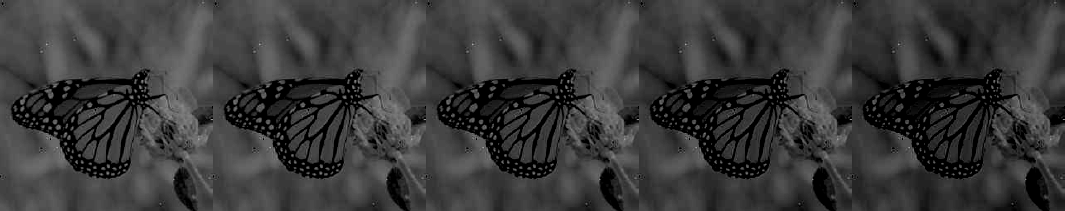

In [ ]:
#use clip_hist function to improve quality of the image and show it
images = []
for p in np.arange(0, 0.1, 0.01):
    lower, upper = get_lower_uppper_bound(image2, p)
    clipped_image = clip_hist(image2, lower, upper)
    images.append(clipped_image)
cv2_imshow(np.concatenate(images[:len(images)//2], axis=1))
cv2_imshow(np.concatenate(images[len(images)//2:], axis=1))